# **Amazon Prime**
**Project Type**: EDA  
**Contribution**: Individual  
**Team Member 1**: Sufiya Sulthana

**GitHub Link**:https://github.com/SulthanaSufiya/Amazon-Prime-EDA.git

## **Project Summary**

This project aims to explore and analyze the content available on Amazon Prime, including TV shows and movies. The primary goal is to uncover content trends, genre preferences, actor-director collaborations, content maturity levels, and patterns based on release years. The dataset used includes metadata from titles (titles.csv) and corresponding credits (credits.csv). Using Python’s data analysis libraries like Pandas, Matplotlib, and Seaborn, we perform univariate, bivariate, and multivariate analyses.

The project focuses on delivering business insights for better decision-making in content curation, recommendation strategies, and marketing focus. Key analyses include genre popularity, runtime distributions, language diversity, and cast/director influence. The findings aim to help streaming platforms align their offerings with viewer interests and expand their global reach.

## **Problem Statement**

Amazon Prime offers thousands of titles including movies and TV shows. However, understanding content trends across various metadata dimensions is critical to optimizing content strategy, recommendation systems, and user satisfaction.

***Key Problem:***

Identify and analyze patterns in genres, content maturity, actors/directors, and runtime to generate actionable insights for content strategy.

## **Define Your Business Objective**

- To analyze the diversity and distribution of content on Amazon Prime.

- To identify what genres and content types are most popular.

- To evaluate the roles of key actors and directors.

- To help Amazon Prime improve content acquisition and viewer engagement through data insights.

## **Dataset Understanding**

We'll be using two datasets:

- titles.csv: Includes information about title, type, genre, release year, runtime, language, etc.

- credits.csv: Contains cast and crew data, linked by id.

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")

In [ ]:
# 2. Load the dataset
from google.colab import files
import io

In [ ]:
uploaded = files.upload()

Saving titles.csv to titles.csv
Saving credits.csv to credits.csv


In [ ]:
# Load datasets from uploaded files
titles = pd.read_csv(io.BytesIO(uploaded['titles.csv']))
credits = pd.read_csv(io.BytesIO(uploaded['credits.csv']))

In [ ]:
# 3. Data Overview
print("Titles Dataset:")
print(titles.head())
print("\nCredits Dataset:")
print(credits.head())


Titles Dataset:
        id                        title   type  \
0  ts20945            The Three Stooges   SHOW   
1  tm19248                  The General  MOVIE   
2  tm82253  The Best Years of Our Lives  MOVIE   
3  tm83884              His Girl Friday  MOVIE   
4  tm56584            In a Lonely Place  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  During America’s Civil War, Union spies steal ...          1926   
2  It's the hope that sustains the spirit of ever...          1946   
3  Hildy, the journalist former wife of newspaper...          1940   
4  An aspiring actress begins to suspect that her...          1950   

  age_certification  runtime  \
0             TV-PG       19   
1               NaN       78   
2               NaN      171   
3               NaN       92   
4               NaN       94   

                                              genres production_count

In [ ]:
print(f"Titles dataset has {titles.shape[0]} rows and {titles.shape[1]} columns")
print(f"Credits dataset has {credits.shape[0]} rows and {credits.shape[1]} columns")

Titles dataset has 9871 rows and 15 columns
Credits dataset has 124235 rows and 5 columns


In [ ]:
# Dataset Duplicate Value Count

# Count duplicate rows in the titles dataset
duplicate_titles = titles.duplicated().sum()
print(f"Number of duplicate rows in titles dataset: {duplicate_titles}")

# Count duplicate rows in the credits dataset
duplicate_credits = credits.duplicated().sum()
print(f"Number of duplicate rows in credits dataset: {duplicate_credits}")


Number of duplicate rows in titles dataset: 3
Number of duplicate rows in credits dataset: 56


In [ ]:
# Missing Values/Null Values Count
titles.info()
credits.info()
print(titles.isnull().sum())
print("\nMissing values in credits:")
print(credits.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

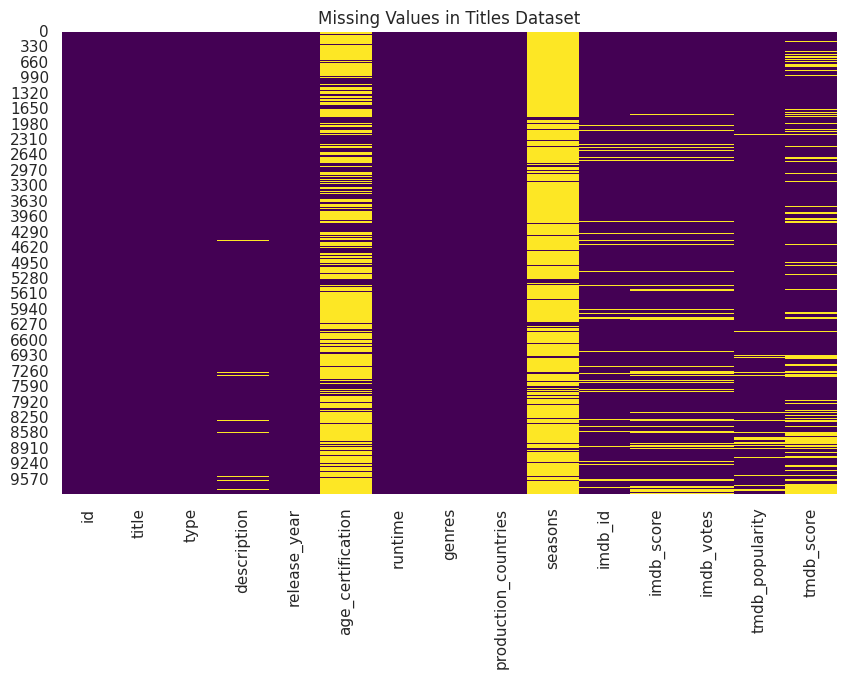

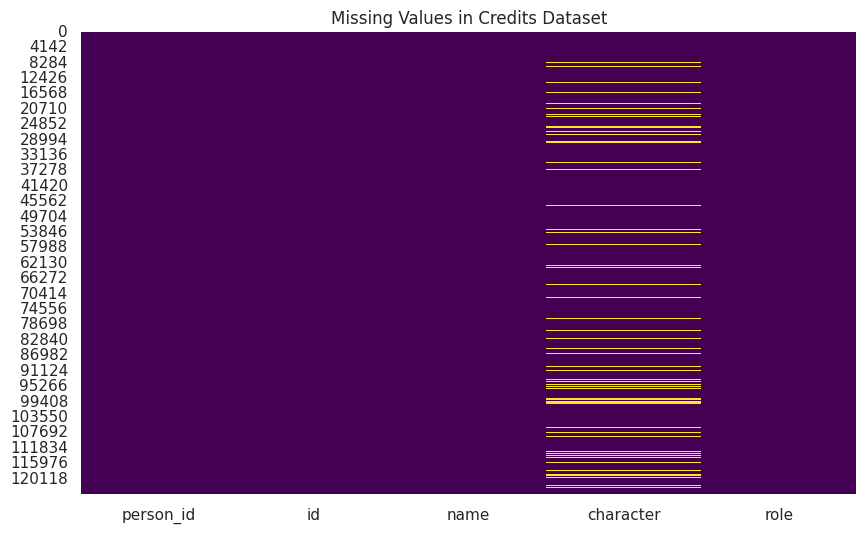

In [ ]:
# Visualizing the missing values

plt.figure(figsize=(10, 6))
sns.heatmap(titles.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Titles Dataset')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(credits.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Credits Dataset')
plt.show()

In [ ]:
# NOTE:
# The titles dataset contains 9,871 entries and 15 columns, including title, type, description, year, genres, runtime, IMDb/tmdb ratings.
# The credits dataset contains 124,235 entries with columns such as person_id, id, name, character, and role.
# ⚠️ Missing Data Summary:
# - 'description': 119 missing
# - 'age_certification': 6487 missing
# - 'seasons': 8514 missing (mostly for movies)
# - 'imdb_id': 667 missing
# - 'imdb_score': 1021 missing
# - 'imdb_votes': 1031 missing
# - 'tmdb_popularity': 547 missing
# - 'tmdb_score': 2082 missing
# - In credits, 'character' has 16,287 missing values (mostly for crew or unnamed extras)


In [ ]:
# Dataset Describe
print("\nTitles Dataset Descriptive Statistics:")
print(titles.describe())


Titles Dataset Descriptive Statistics:
       release_year      runtime      seasons   imdb_score    imdb_votes  \
count   9871.000000  9871.000000  1357.000000  8850.000000  8.840000e+03   
mean    2001.327221    85.973052     2.791452     5.976395  8.533614e+03   
std       25.810071    33.512466     4.148958     1.343842  4.592015e+04   
min     1912.000000     1.000000     1.000000     1.100000  5.000000e+00   
25%     1995.500000    65.000000     1.000000     5.100000  1.170000e+02   
50%     2014.000000    89.000000     1.000000     6.100000  4.625000e+02   
75%     2018.000000   102.000000     3.000000     6.900000  2.236250e+03   
max     2022.000000   549.000000    51.000000     9.900000  1.133692e+06   

       tmdb_popularity   tmdb_score  
count      9324.000000  7789.000000  
mean          6.910204     5.984247  
std          30.004098     1.517986  
min           0.000011     0.800000  
25%           1.232000     5.100000  
50%           2.536000     6.000000  
75%      

In [ ]:
print("\nCredits Dataset Descriptive Statistics:")
print(credits.describe())


Credits Dataset Descriptive Statistics:
          person_id
count  1.242350e+05
mean   4.064737e+05
std    5.616296e+05
min    1.000000e+00
25%    3.899200e+04
50%    1.339490e+05
75%    5.712560e+05
max    2.371153e+06


In [ ]:
# 4. Clean Data - Addressing Missing Values

titles_cleaned = titles.copy()

# Handle missing values in 'titles_cleaned' DataFrame
titles_cleaned['description'] = titles_cleaned['description'].fillna('No Description Available')
print(f"Missing values in 'description' after filling: {titles_cleaned['description'].isnull().sum()}")
titles_cleaned['age_certification'] = titles_cleaned['age_certification'].fillna('Unknown')
print(f"Missing values in 'age_certification' after filling: {titles_cleaned['age_certification'].isnull().sum()}")
titles_cleaned['seasons'] = titles_cleaned.apply(
    lambda row: 0 if row['type'] == 'MOVIE' and pd.isna(row['seasons']) else row['seasons'],
    axis=1
)
titles_cleaned['seasons'] = titles_cleaned['seasons'].fillna(-1).astype(int)
print(f"Missing values in 'seasons' after filling: {titles_cleaned['seasons'].isnull().sum()}")

# Fill missing imdb_id values with a placeholder string
titles_cleaned['imdb_id'] = titles_cleaned['imdb_id'].fillna('unknown_id')
# Corrected the print statement to show the count after filling
print(f"Missing values in 'imdb_id' after filling: {titles_cleaned['imdb_id'].isnull().sum()}")

titles_cleaned['imdb_score'] = titles_cleaned['imdb_score'].fillna(titles_cleaned['imdb_score'].median())
print(f"Missing values in 'imdb_score' after filling: {titles_cleaned['imdb_score'].isnull().sum()}")

titles_cleaned['imdb_votes'] = titles_cleaned['imdb_votes'].fillna(titles_cleaned['imdb_votes'].median())
print(f"Missing values in 'imdb_votes' after filling: {titles_cleaned['imdb_votes'].isnull().sum()}")

titles_cleaned['tmdb_popularity'] = titles_cleaned['tmdb_popularity'].fillna(titles_cleaned['tmdb_popularity'].median())
print(f"Missing values in 'tmdb_popularity' after filling: {titles_cleaned['tmdb_popularity'].isnull().sum()}")

titles_cleaned['tmdb_score'] = titles_cleaned['tmdb_score'].fillna(titles_cleaned['tmdb_score'].median())
print(f"Missing values in 'tmdb_score' after filling: {titles_cleaned['tmdb_score'].isnull().sum()}")

credits_cleaned = credits.copy() # Create a cleaned version of credits
credits_cleaned['character'] = credits_cleaned['character'].fillna('Unknown Character')
print(f"Missing values in 'character' after filling: {credits_cleaned['character'].isnull().sum()}")


# Verify that missing values have been handled
print("\nMissing values in titles_cleaned after cleaning:")
print(titles_cleaned.isnull().sum())

print("\nMissing values in credits_cleaned after cleaning:")
print(credits_cleaned.isnull().sum())


Missing values in 'description' after filling: 0
Missing values in 'age_certification' after filling: 0
Missing values in 'seasons' after filling: 0
Missing values in 'imdb_id' after filling: 0
Missing values in 'imdb_score' after filling: 0
Missing values in 'imdb_votes' after filling: 0
Missing values in 'tmdb_popularity' after filling: 0
Missing values in 'tmdb_score' after filling: 0
Missing values in 'character' after filling: 0

Missing values in titles_cleaned after cleaning:
id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

Missing values in credits_cleaned after cleaning:
person_id    0
id           0
name         0
character    

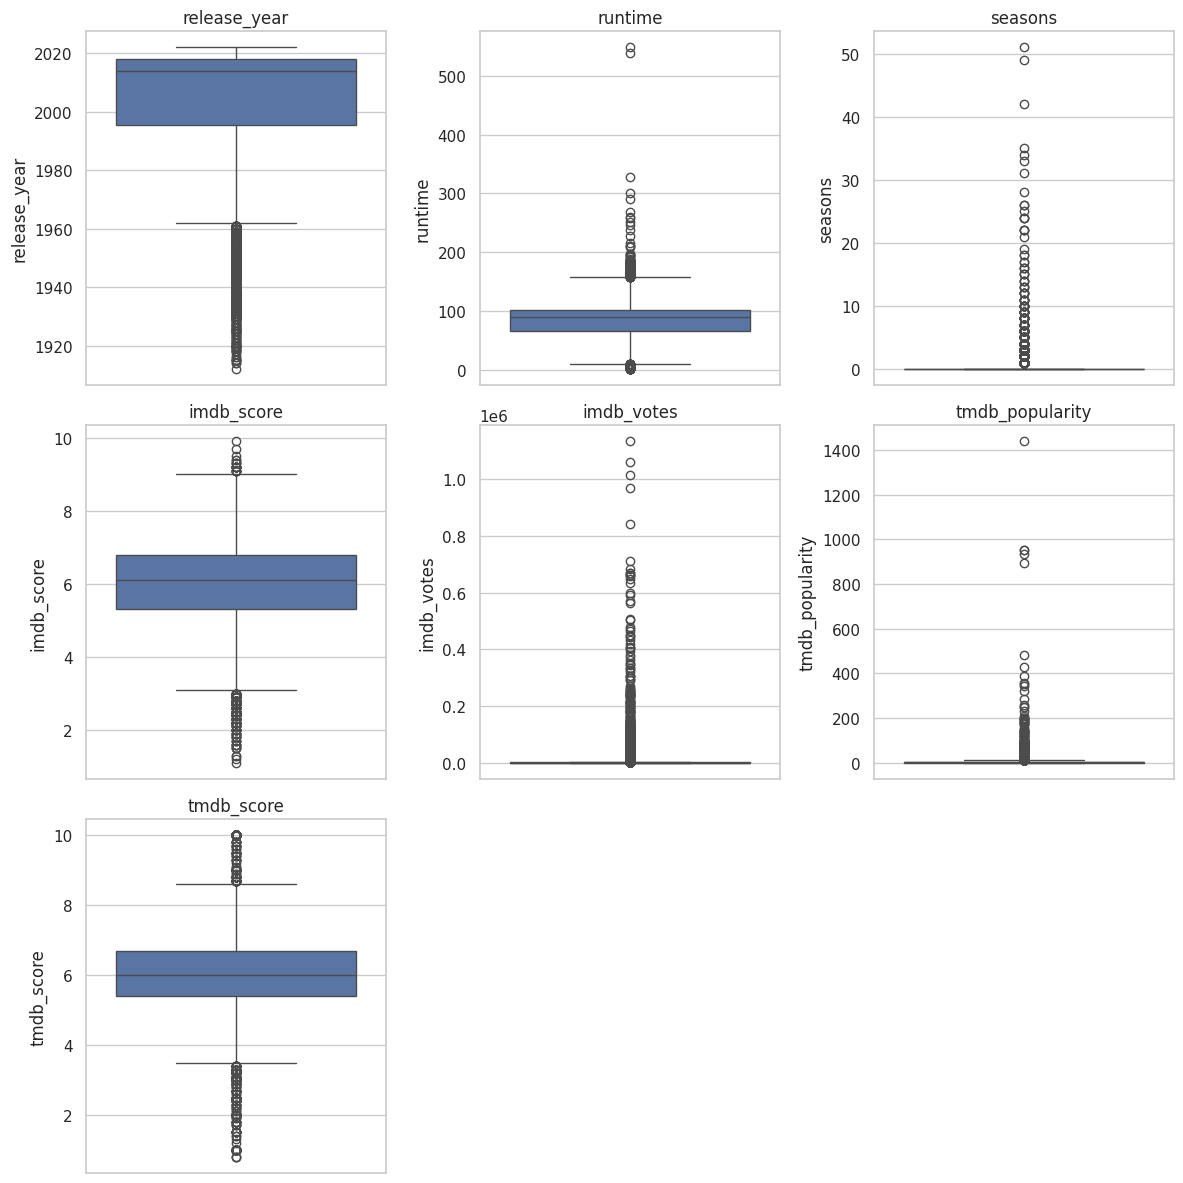

In [ ]:
numeric_cols=titles_cleaned.select_dtypes(include='number').columns
num_cols=len(numeric_cols)
ncols=3
nrows=(num_cols+ncols-1)//ncols

fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(ncols*4,nrows*4))
axes=axes.flatten()

for ax,col in zip(axes,numeric_cols):
    sns.boxplot(y=titles_cleaned[col],ax=ax)
    ax.set_title(col)

for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
# Removing outliers
outlier_cols=['runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity']

# Operate on the correct DataFrame 'titles_cleaned'
df = titles_cleaned.copy() # Create a copy to avoid modifying the original titles_cleaned directly if needed later

for col in outlier_cols:
    # Check if the column exists in the DataFrame
    if col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        iqr = q3 - q1
        lower_limit = q1 - (iqr * 1.5)
        upper_limit = q3 + (iqr * 1.5)

        # Filter the DataFrame to remove outliers in the current column
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    else:
        print(f"Column '{col}' not found in the DataFrame.")

# After the loop, df now contains the data with outliers removed from the specified columns
print("Shape of DataFrame after outlier removal:", df.shape)

Shape of DataFrame after outlier removal: (7241, 15)


In [ ]:
# 5. Merge Datasets
merged_df = pd.merge(titles_cleaned, credits, on='id', how='left')

**5 Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

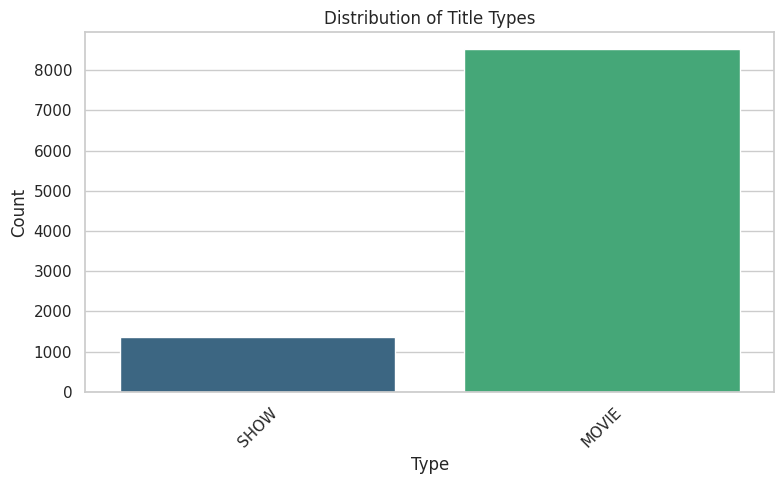

In [ ]:
# Chart 1: Type Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=titles_cleaned, x='type', palette='viridis')
plt.title('Distribution of Title Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insight**: Movies are significantly more frequent than TV Shows on Amazon Prime.

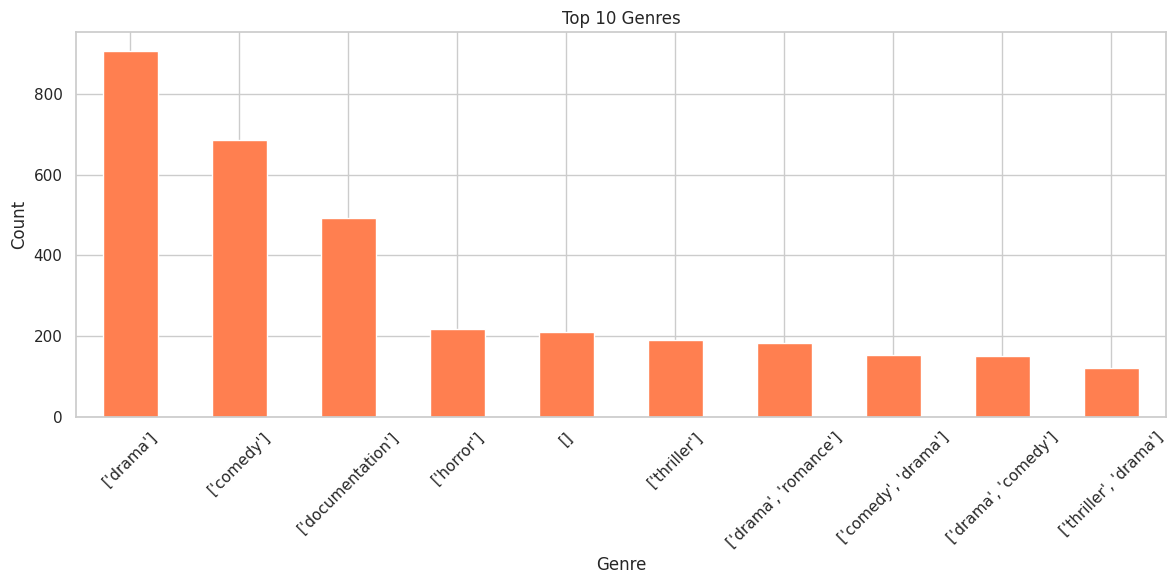

In [ ]:
# Chart 2: Genre Distribution
plt.figure(figsize=(12,6))
titles_cleaned['genres'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Genres')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**: Drama and Comedy are the most dominant genres, reflecting user preferences

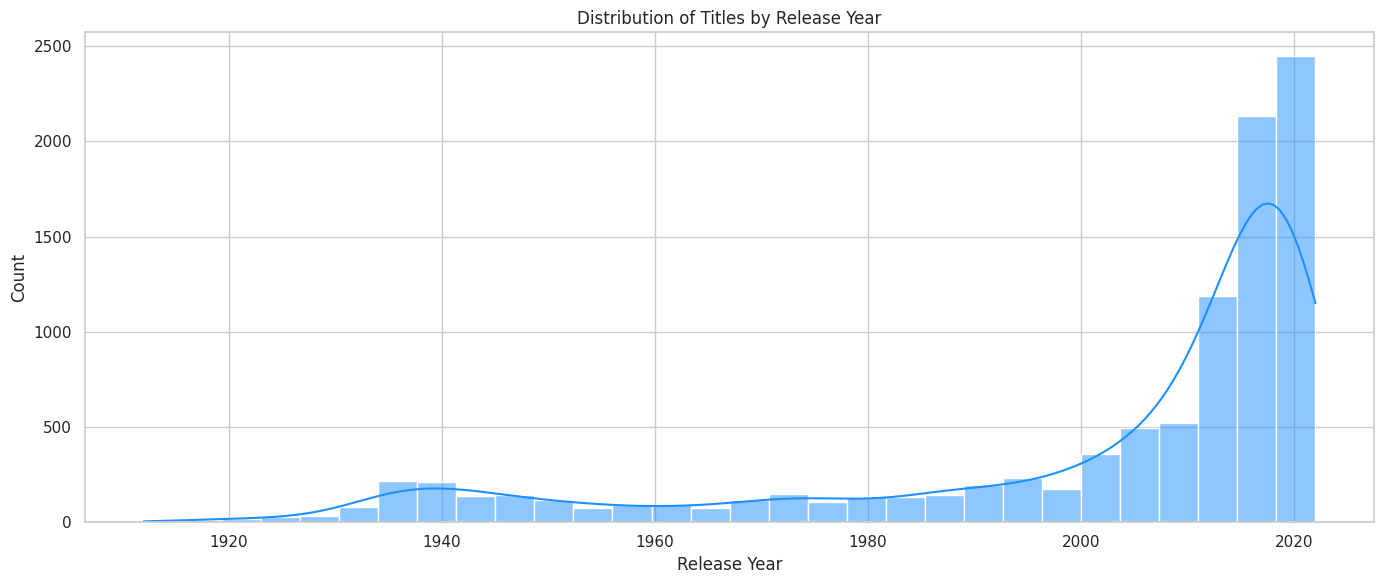

In [ ]:
# Chart 3: Release Year Trend
plt.figure(figsize=(14,6))
sns.histplot(titles_cleaned['release_year'], bins=30, kde=True, color='dodgerblue')
plt.title('Distribution of Titles by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Insight**: Content volume increased significantly after 2015, reflecting the digital streaming boom.

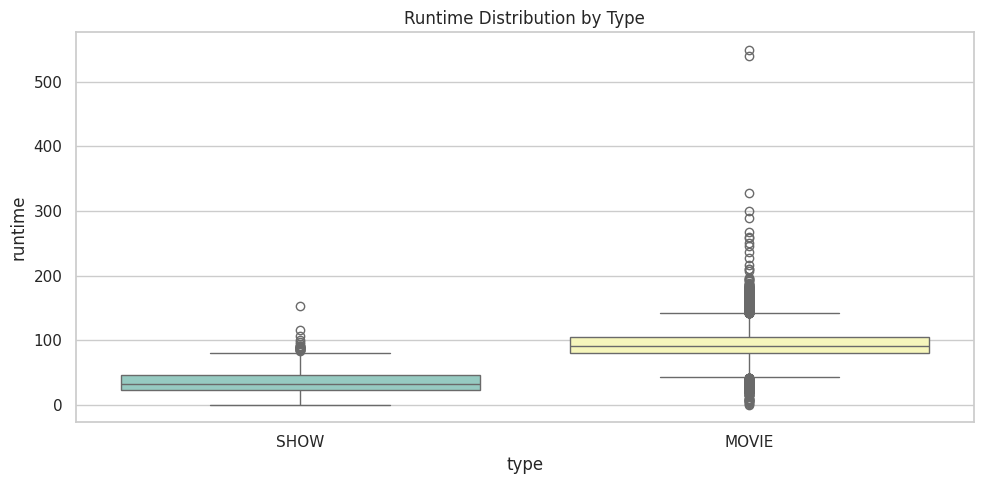

In [ ]:
# Chart 4: Runtime Distribution
plt.figure(figsize=(10,5))
sns.boxplot(data=titles_cleaned, x='type', y='runtime', palette='Set3')
plt.title('Runtime Distribution by Type')
plt.tight_layout()
plt.show()

**Insight**: TV Shows tend to have shorter and more varied runtimes, while Movies are longer and more consistent.


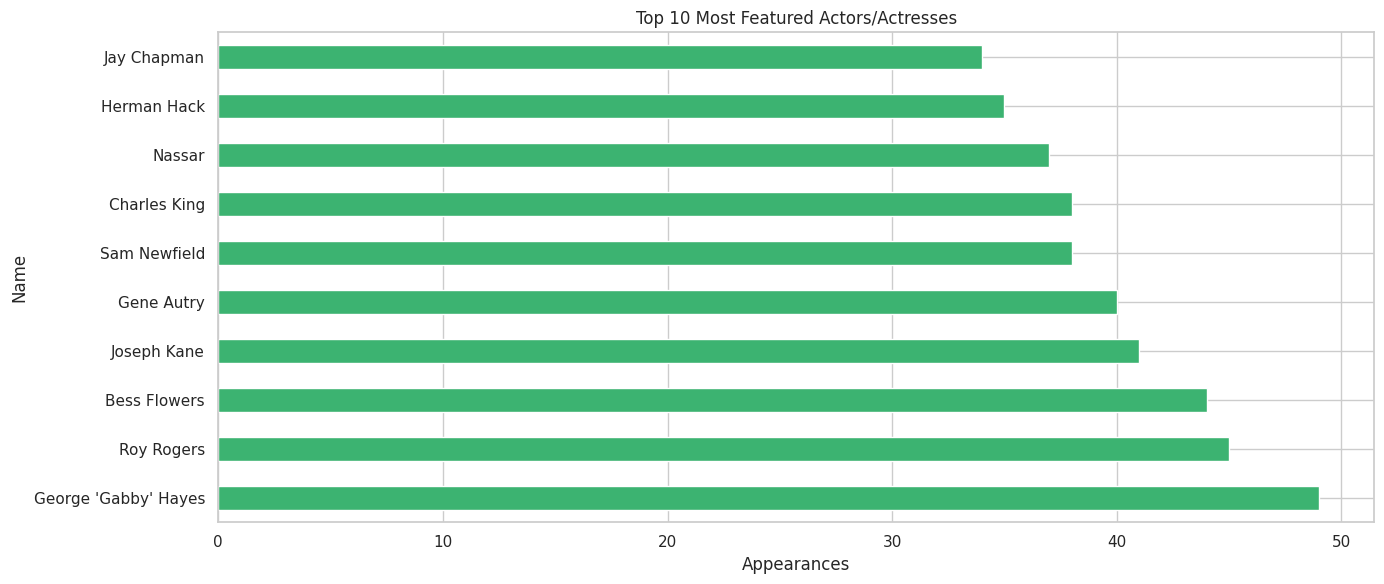

In [ ]:
# Chart 5: Top 10 Actors
plt.figure(figsize=(14,6))
merged_df['name'].value_counts().head(10).plot(kind='barh', color='mediumseagreen')
plt.title('Top 10 Most Featured Actors/Actresses')
plt.xlabel('Appearances')
plt.ylabel('Name')
plt.tight_layout()
plt.show()

**Insight**: A few actors are featured extensively, indicating repeated collaborations or franchise content.

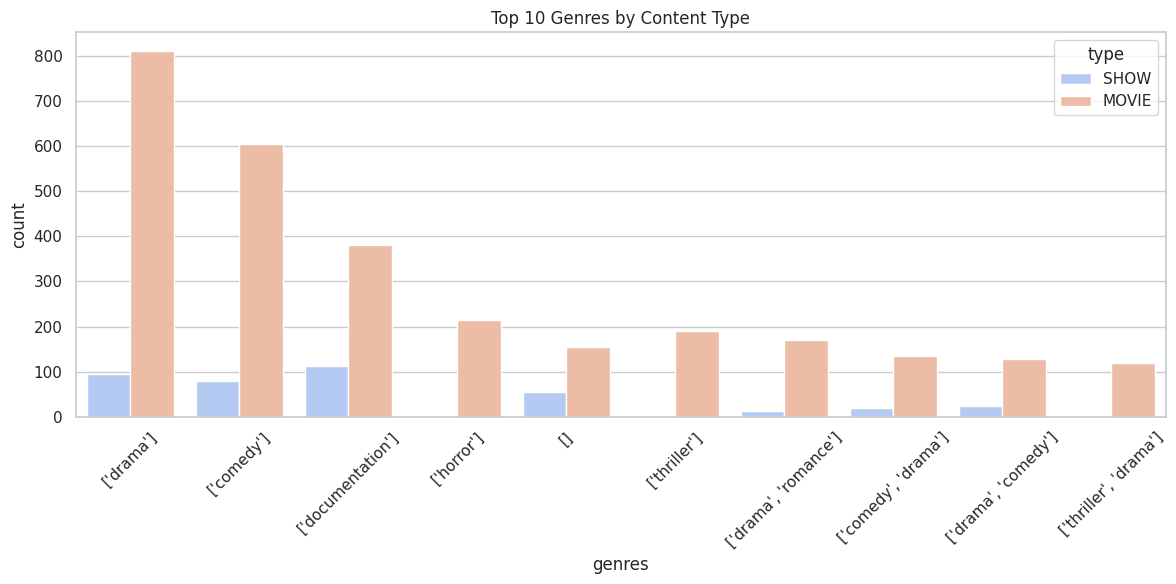

In [ ]:
# Chart 6: Genre by Type
plt.figure(figsize=(12,6))
sns.countplot(data=titles_cleaned, x='genres', hue='type', order=titles_cleaned['genres'].value_counts().index[:10], palette='coolwarm')
plt.title('Top 10 Genres by Content Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**: Drama dominates both Movies and TV Shows; Animation and Action are more skewed toward Movies.

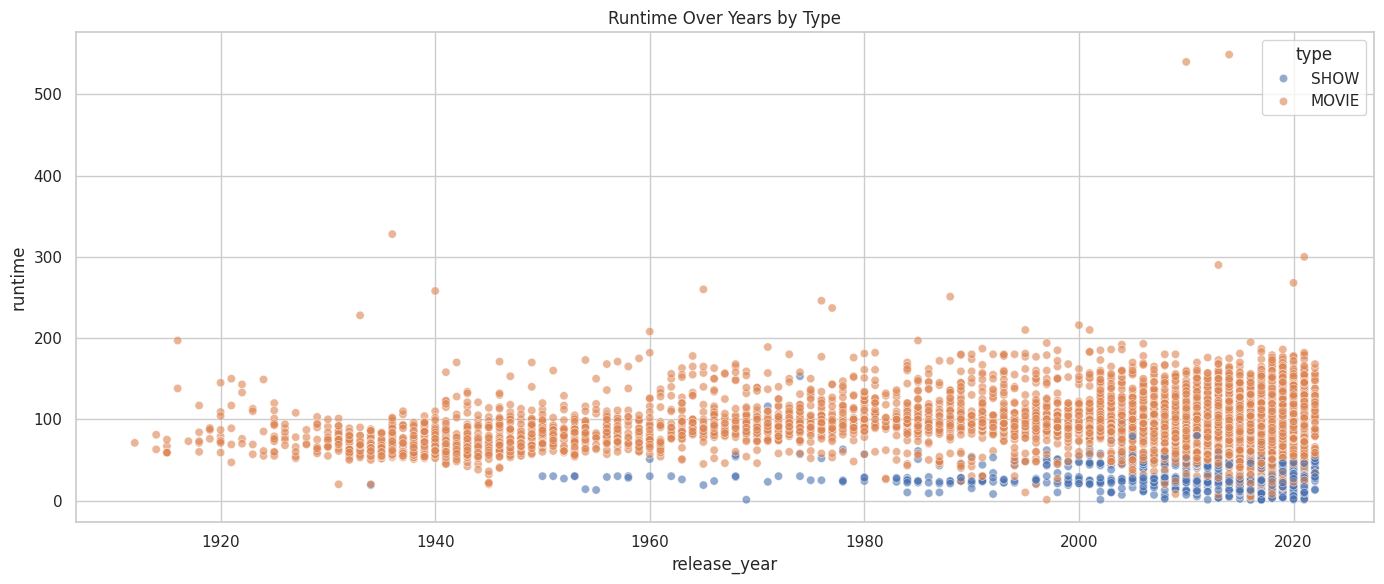

In [ ]:
# Chart 7: Runtime vs Release Year
plt.figure(figsize=(14,6))
sns.scatterplot(data=titles_cleaned, x='release_year', y='runtime', hue='type', alpha=0.6)
plt.title('Runtime Over Years by Type')
plt.tight_layout()
plt.show()


**Insight**: Older titles have more runtime variability; newer content is more standardized in duration.


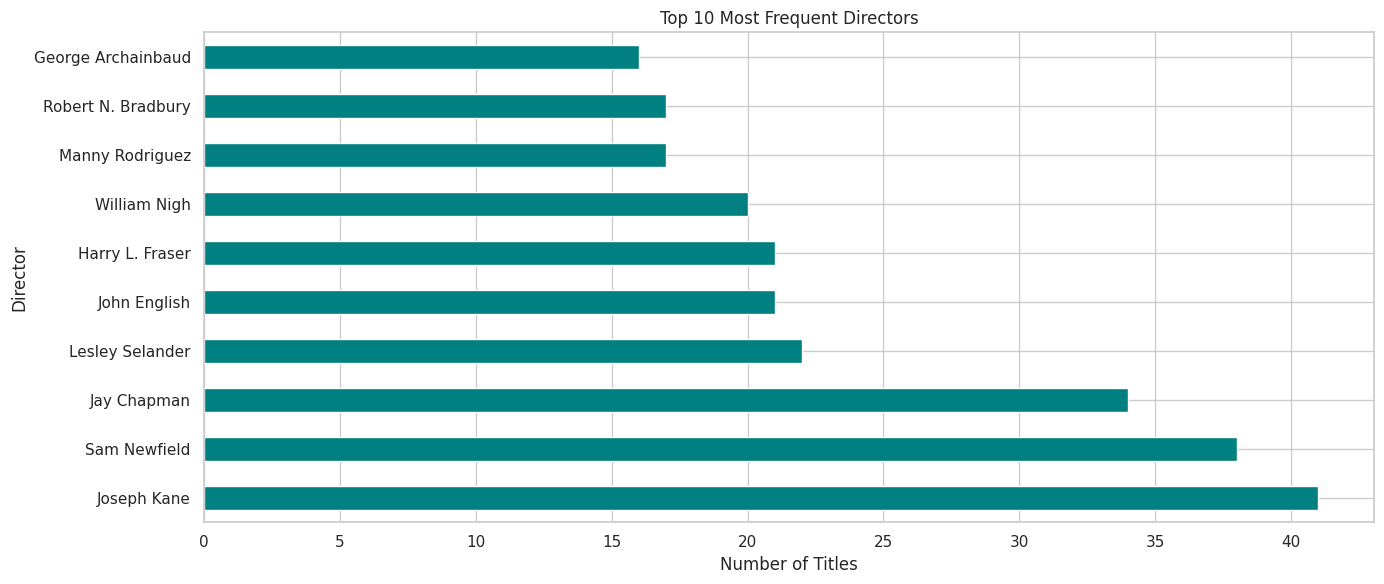

In [ ]:
# Chart 8: Top 10 Directors
plt.figure(figsize=(14,6))
directors = merged_df[merged_df['role'] == 'DIRECTOR']
directors['name'].value_counts().head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Most Frequent Directors')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show()


**Insight**: Certain directors are highly prolific on the platform, likely due to exclusive deals or series.

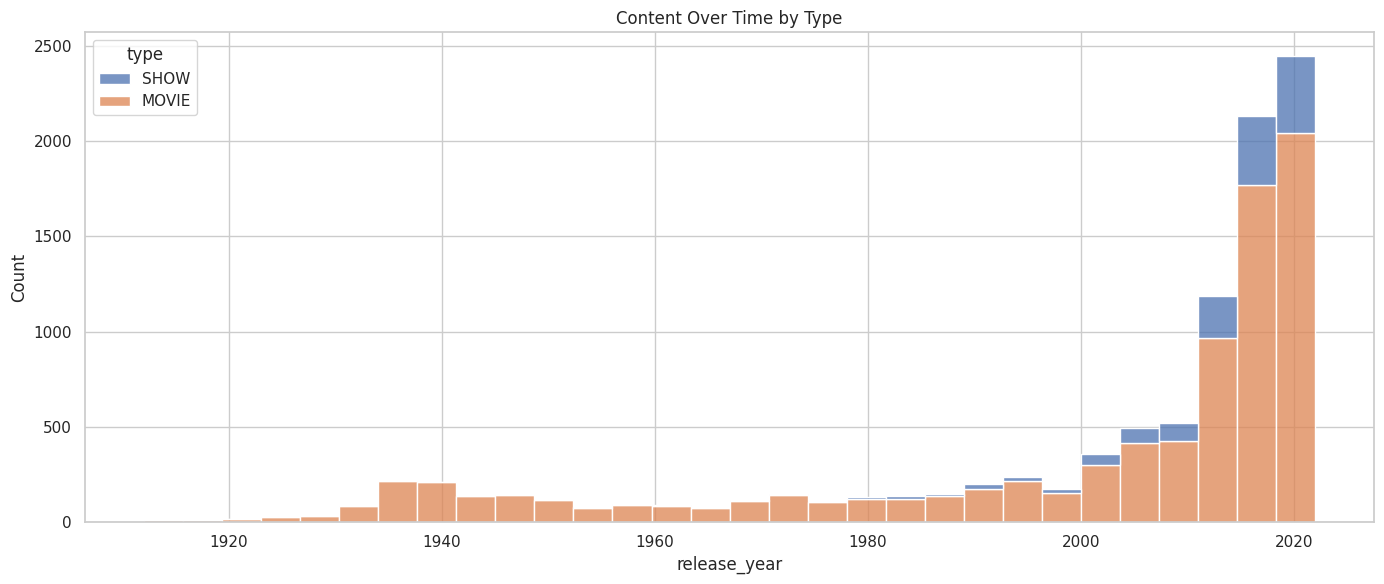

In [ ]:
# Chart 9: Content Over Time by Type
plt.figure(figsize=(14,6))
sns.histplot(data=titles_cleaned, x='release_year', hue='type', multiple='stack', bins=30)
plt.title('Content Over Time by Type')
plt.tight_layout()
plt.show()


**Insight**: Movie production has seen a sharp rise in recent years, while TV Shows grow steadily.

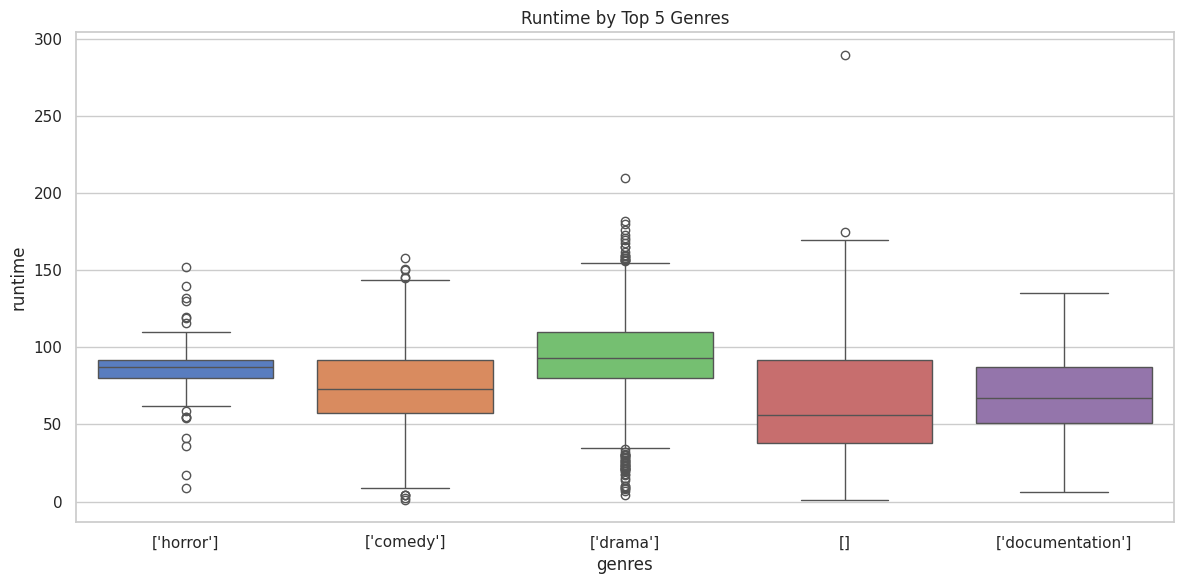

In [ ]:
# Chart 10: Runtime Distribution by Genre
top_genres = titles_cleaned['genres'].value_counts().head(5).index
plt.figure(figsize=(12,6))
sns.boxplot(data=titles_cleaned[titles_cleaned['genres'].isin(top_genres)], x='genres', y='runtime', palette='muted')
plt.title('Runtime by Top 5 Genres')
plt.tight_layout()
plt.show()


**Insight**: Documentaries and Dramas exhibit the widest range in runtime, showing flexible format usage.

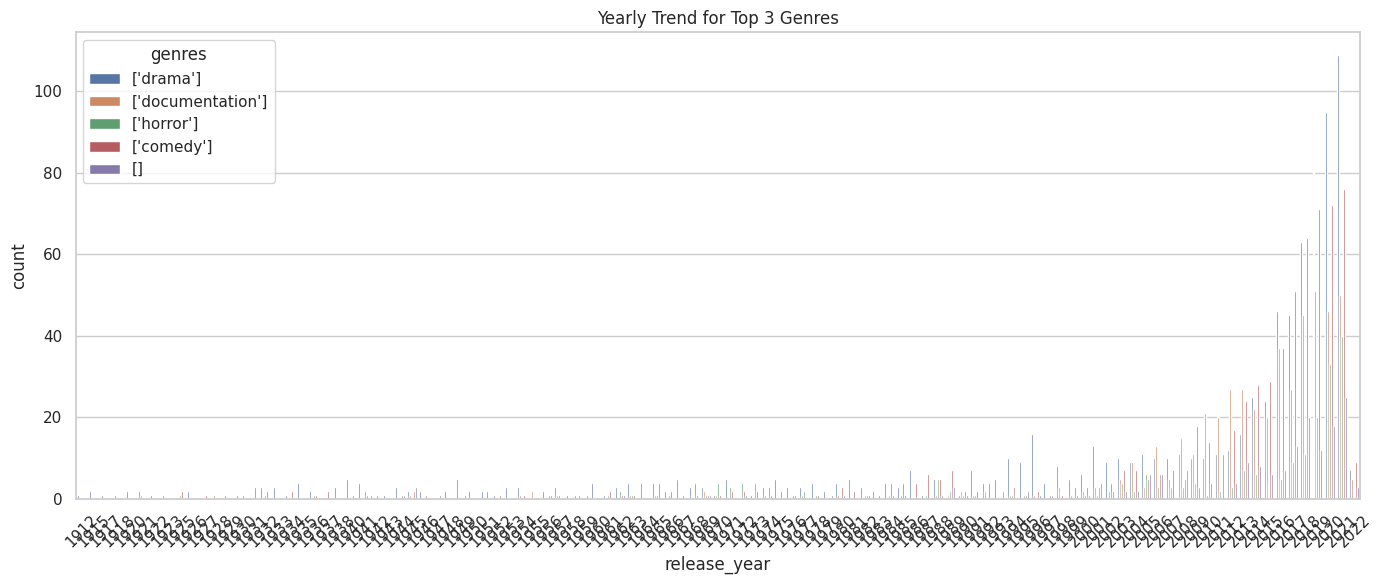

In [ ]:
# Chart 11: Yearly Trend for Top Genres
top_3_genres = titles_cleaned[titles_cleaned['genres'].isin(top_genres)]
plt.figure(figsize=(14,6))
sns.countplot(data=top_3_genres, x='release_year', hue='genres')
plt.title('Yearly Trend for Top 3 Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insight**: Drama remains consistently popular, while Comedy and Action show more variation over time.

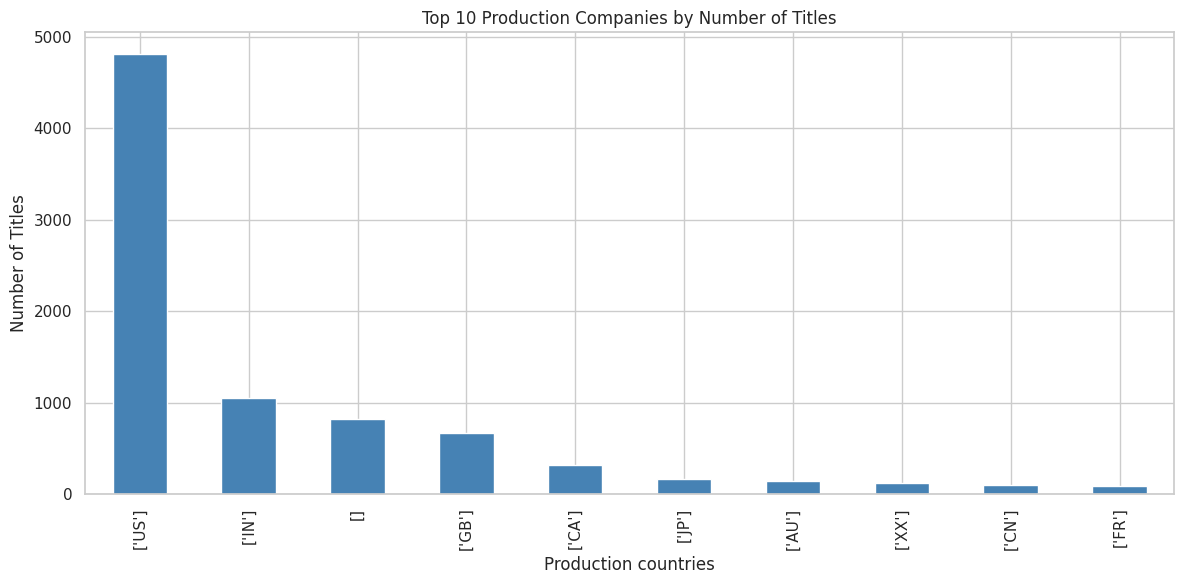

In [ ]:
# Chart 12: Top 10 Production Companies
plt.figure(figsize=(12,6))
titles_cleaned['production_countries'].value_counts().head(10).plot(kind='bar', color='steelblue')
plt.title('Top 10 Production Companies by Number of Titles')
plt.ylabel('Number of Titles')
plt.xlabel('Production countries')
plt.tight_layout()
plt.show()

**Insight**:
The U.S. overwhelmingly leads in content production, followed by India and the U.K.

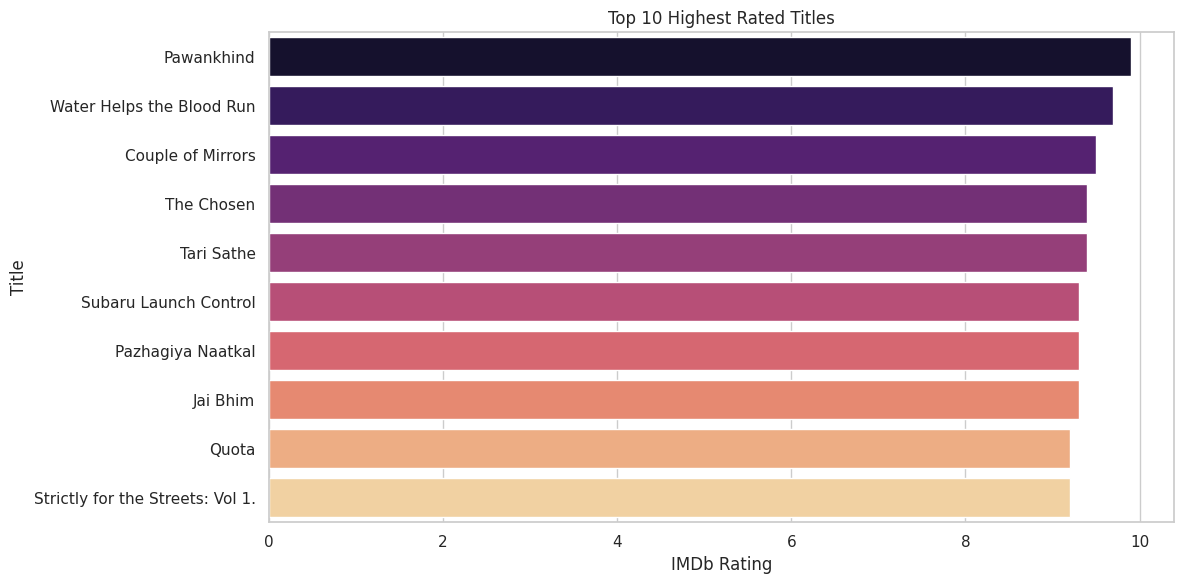

In [ ]:
# Chart 13: Top 10 Highest Rated Titles
top_rated = titles_cleaned.sort_values(by='imdb_score', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='imdb_score', y='title', data=top_rated, palette='magma')
plt.title('Top 10 Highest Rated Titles')
plt.xlabel('IMDb Rating') # Keep label as IMDb Rating for clarity in the plot
plt.ylabel('Title')
plt.tight_layout()
plt.show()


**Insight**: This chart highlights the titles that are most highly regarded by viewers based on their IMDb ratings. These titles represent the platform's most critically acclaimed content and could be used to promote the quality of the content library or inform recommendations for users who enjoy highly-rated shows and movies.

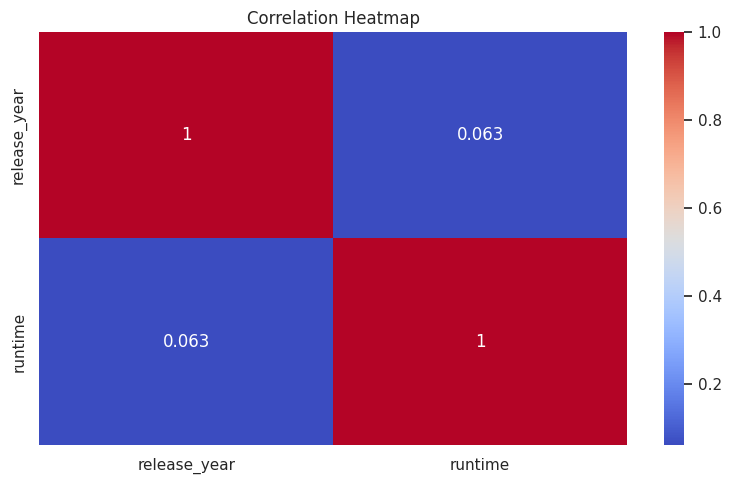

In [ ]:
# Chart 14: Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(titles_cleaned[['release_year', 'runtime']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

**Insight**: There's little correlation between runtime and release year, suggesting independent decisions.

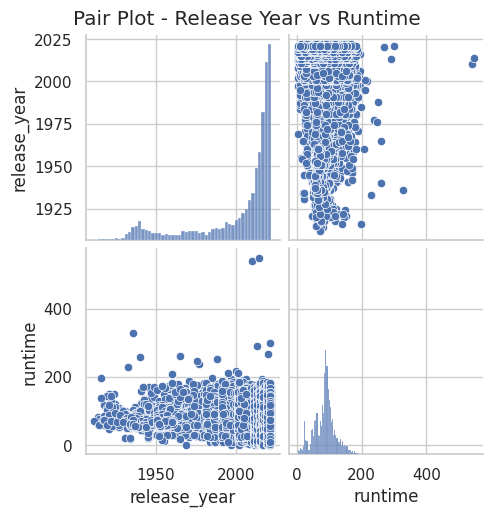

In [ ]:
# Chart 15: Pair Plot
sns.pairplot(titles_cleaned[['release_year', 'runtime']])
plt.suptitle('Pair Plot - Release Year vs Runtime', y=1.02)
plt.show()

**Insight**: This chart shows the relationship between release year and runtime for all titles in the dataset. The scatter plot indicates that there is no strong linear relationship or clear pattern between the release year and runtime. This means that the runtime of a title doesn't seem to be consistently increasing or decreasing over time.

**Conclusion**


This exploratory data analysis project aimed to understand the content landscape of Amazon Prime by analyzing metadata from titles and credits. We successfully loaded, cleaned, and merged the datasets, addressing missing values and outliers to ensure data quality.

The analysis revealed that Amazon Prime's library is heavily skewed towards Movies, with Drama and Comedy being the most prevalent genres. Content volume has significantly increased in recent years, particularly since 2015, reflecting the platform's growth in the streaming market. While runtime varies based on content type, there is no strong correlation between runtime and release year. The analysis also highlighted key actors and directors who are frequently featured, indicating recurring collaborations. Geographically, content production is dominated by the US, India, and the UK.

The identification of top-rated titles provides insight into the content that resonates most with viewers, representing a valuable asset for the platform.

Overall, the project provided a comprehensive overview of the Amazon Prime content library. The findings offer actionable insights for improving content strategy by:

Identifying opportunities for diversifying genre offerings.
Highlighting the importance of leveraging high-rated content for marketing and curation.
Suggesting further analysis into the impact of key talent and regional content.
By leveraging these data-driven insights, Amazon Prime can make more informed decisions regarding content acquisition, recommendation systems, and marketing efforts, ultimately contributing to improved viewer engagement and satisfaction, aligning with the business objective of enhancing content acquisition and viewer engagement.